In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt

In [2]:
gld = pdr.get_data_yahoo('JPM')
day = np.arange(1, len(gld) + 1)
gld['day'] = day
gld.drop(columns=['Adj Close', 'Volume'], inplace = True)
gld = gld[['day', 'Open', 'High', 'Low', 'Close']]
gld.head()

,day,Open,High,Low,Close
Date,,,,,
2017-07-07,1,93.959999,94.169998,93.230003,93.849998
2017-07-10,2,93.500000,93.680000,93.089996,93.190002
2017-07-11,3,93.330002,93.330002,92.279999,92.830002
2017-07-12,4,92.610001,92.830002,92.070000,92.510002
2017-07-13,5,92.690002,93.379997,92.339996,93.099998


In [3]:
gld['9-day'] = gld['Close'].rolling(9).mean()
gld['21-day'] = gld['Close'].rolling(21).mean()
gld[19:25]

,day,Open,High,Low,Close,9-day,21-day
Date,,,,,,,
2017-08-03,20,92.699997,93.129997,92.239998,92.500000,92.142223,NaN
2017-08-04,21,93.500000,94.400002,93.470001,93.660004,92.406668,92.210476
2017-08-07,22,93.889999,94.190002,93.709999,94.019997,92.542223,92.218572
2017-08-08,23,93.949997,95.220001,93.599998,93.680000,92.736667,92.241905
2017-08-09,24,92.980003,93.680000,92.830002,93.529999,92.956667,92.275238
2017-08-10,25,92.900002,93.070000,92.070000,92.190002,93.057778,92.260000


In [4]:
gld['signal'] = np.where(gld['9-day'] > gld['21-day'], 1, 0)
gld['signal'] = np.where(gld['9-day'] < gld['21-day'], -1, gld['signal'])
gld.dropna(inplace=True)
gld.head()

,day,Open,High,Low,Close,9-day,21-day,signal
Date,,,,,,,,
2017-08-04,21,93.500000,94.400002,93.470001,93.660004,92.406668,92.210476,1
2017-08-07,22,93.889999,94.190002,93.709999,94.019997,92.542223,92.218572,1
2017-08-08,23,93.949997,95.220001,93.599998,93.680000,92.736667,92.241905,1
2017-08-09,24,92.980003,93.680000,92.830002,93.529999,92.956667,92.275238,1
2017-08-10,25,92.900002,93.070000,92.070000,92.190002,93.057778,92.260000,1


In [5]:
gld['return'] = np.log(gld['Close']).diff()
gld['system_return'] = gld['signal'] * gld['return']
gld['entry'] = gld.signal.diff()
gld.head()

,day,Open,High,Low,Close,9-day,21-day,signal,return,system_return,entry
Date,,,,,,,,,,,
2017-08-04,21,93.500000,94.400002,93.470001,93.660004,92.406668,92.210476,1,NaN,NaN,NaN
2017-08-07,22,93.889999,94.190002,93.709999,94.019997,92.542223,92.218572,1,0.003836,0.003836,0.0
2017-08-08,23,93.949997,95.220001,93.599998,93.680000,92.736667,92.241905,1,-0.003623,-0.003623,0.0
2017-08-09,24,92.980003,93.680000,92.830002,93.529999,92.956667,92.275238,1,-0.001602,-0.001602,0.0
2017-08-10,25,92.900002,93.070000,92.070000,92.190002,93.057778,92.260000,1,-0.014431,-0.014431,0.0


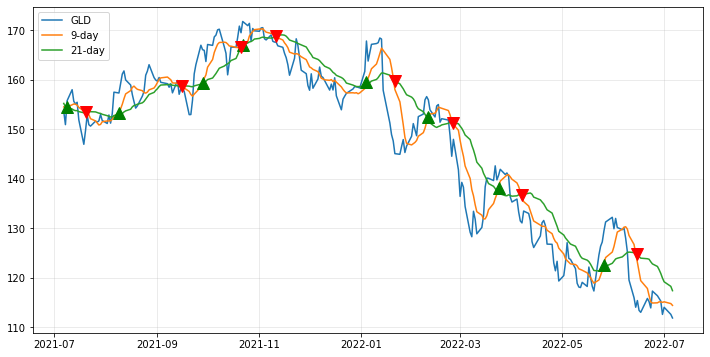

In [6]:
plt.rcParams['figure.figsize'] = 12, 6
plt.grid(True, alpha = .3)
plt.plot(gld.iloc[-252:]['Close'], label = 'GLD')
plt.plot(gld.iloc[-252:]['9-day'], label = '9-day')
plt.plot(gld.iloc[-252:]['21-day'], label = '21-day')
plt.plot(gld[-252:].loc[gld.entry == 2].index, gld[-252:]['9-day'][gld.entry == 2], '^',
         color = 'g', markersize = 12)
plt.plot(gld[-252:].loc[gld.entry == -2].index, gld[-252:]['21-day'][gld.entry == -2], 'v',
         color = 'r', markersize = 12)
plt.legend(loc=2);